# Анализ данных рака груди и его признаков с помощью мат. статистики

## Импорт данных

In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### Создадим загаловки для стобцов. Доп. инф. см. wdbc.names

In [91]:
features = [
    "Radius",
	"Texture",
	"Perimeter",
	"Area",
	"Smoothness",
	"Compactness",
	"Concavity",
	"Concave_points",
	"Symmetry", 
	"Fractal_dimension"
]
states = [
    "Mean",
    "Standard_error",
    "Largest"
]
header = [feature + "_" + state for state in states for feature in features]
header = ["ID", "Diagnosis", *header]

#### Добавим столбец Diagnosis_Int, чтобы можно было вычислить корреляцию для Diagnosis

In [92]:
df = pd.read_csv("wdbc.data", delimiter=",", names=header)
df["Diagnosis_Int"] = np.where(df["Diagnosis"] == "M", 1, 0)

In [93]:
df_base = pd.read_csv("wdbc.data", delimiter=",", names=header)
df_base["Diagnosis_Int"] = np.where(df_base["Diagnosis"] == "M", 1, 0)

In [94]:
df.head()

,ID,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_points_Mean,...,Texture_Largest,Perimeter_Largest,Area_Largest,Smoothness_Largest,Compactness_Largest,Concavity_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [95]:
df = df.drop(columns="ID")

## Информация о данных

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Diagnosis                         569 non-null    object 
 1   Radius_Mean                       569 non-null    float64
 2   Texture_Mean                      569 non-null    float64
 3   Perimeter_Mean                    569 non-null    float64
 4   Area_Mean                         569 non-null    float64
 5   Smoothness_Mean                   569 non-null    float64
 6   Compactness_Mean                  569 non-null    float64
 7   Concavity_Mean                    569 non-null    float64
 8   Concave_points_Mean               569 non-null    float64
 9   Symmetry_Mean                     569 non-null    float64
 10  Fractal_dimension_Mean            569 non-null    float64
 11  Radius_Standard_error             569 non-null    float64
 12  Texture_

In [97]:
df.describe()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_points_Mean,Symmetry_Mean,Fractal_dimension_Mean,...,Texture_Largest,Perimeter_Largest,Area_Largest,Smoothness_Largest,Compactness_Largest,Concavity_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Корреляция с помощью SciPy

#### Как видим, полученные корреляции для всех признаков статистически значимы.

#### Получим корреляцию Diagnosis с признаками.

In [98]:
diagnosis_corr = {}
for column in df.drop("Diagnosis", axis=1):
    pearson_corr, p_val = stats.pearsonr(df_base[column], df_base["Diagnosis_Int"])
    diagnosis_corr[column] = pearson_corr
    print(f"{column}. Corr = {pearson_corr} , p_value = {p_val}")

Radius_Mean. Corr = 0.7300285113754564 , p_value = 8.465940572258751e-96
Texture_Mean. Corr = 0.4151852998452044 , p_value = 4.058636047896155e-25
Perimeter_Mean. Corr = 0.7426355297258331 , p_value = 8.436251036168419e-101
Area_Mean. Corr = 0.70898383658539 , p_value = 4.734564310304486e-88
Smoothness_Mean. Corr = 0.3585599650859321 , p_value = 1.051850359202694e-18
Compactness_Mean. Corr = 0.5965336775082533 , p_value = 3.9382631058850314e-56
Concavity_Mean. Corr = 0.6963597071719059 , p_value = 9.966555755066088e-84
Concave_points_Mean. Corr = 0.7766138400204354 , p_value = 7.101150161054297e-116
Symmetry_Mean. Corr = 0.3304985542625471 , p_value = 5.733384028463847e-16
Fractal_dimension_Mean. Corr = -0.012837602698432406 , p_value = 0.7599368037251972
Radius_Standard_error. Corr = 0.5671338208247177 , p_value = 9.738948656455998e-50
Texture_Standard_error. Corr = -0.008303332973877427 , p_value = 0.8433320287665917
Perimeter_Standard_error. Corr = 0.5561407034314833 , p_value = 1.6

## Корреляция признаков

In [99]:
corr = df.corr()
corr

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_points_Mean,Symmetry_Mean,Fractal_dimension_Mean,...,Texture_Largest,Perimeter_Largest,Area_Largest,Smoothness_Largest,Compactness_Largest,Concavity_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Radius_Mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
Texture_Mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
Perimeter_Mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
Area_Mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
Smoothness_Mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
Compactness_Mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
Concavity_Mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
Concave_points_Mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
Symmetry_Mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
Fractal_dimension_Mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [100]:
corr[corr["Concave_points_Largest"] > 0.9]

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_points_Mean,Symmetry_Mean,Fractal_dimension_Mean,...,Texture_Largest,Perimeter_Largest,Area_Largest,Smoothness_Largest,Compactness_Largest,Concavity_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Concave_points_Mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
Concave_points_Largest,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,0.430297,0.175325,...,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566


### Найдем пары признаков, у которых корреляция > 0.9

In [101]:
corField = []
counter = 0
for column in corr:
    for row in corr.index[abs(corr[column]) > 0.9]:
        if row != column and (row, column) not in corField:
            corField.append((column, row))
            print(f"{row} {column} {corr.loc[row, column]}")
            counter += 1
print(counter)

Perimeter_Mean Radius_Mean 0.9978552814938109
Area_Mean Radius_Mean 0.9873571700566127
Radius_Largest Radius_Mean 0.9695389726112055
Perimeter_Largest Radius_Mean 0.9651365139559871
Area_Largest Radius_Mean 0.9410824595860461
Texture_Largest Texture_Mean 0.912044588840421
Area_Mean Perimeter_Mean 0.9865068039913907
Radius_Largest Perimeter_Mean 0.9694763634663146
Perimeter_Largest Perimeter_Mean 0.9703868870426394
Area_Largest Perimeter_Mean 0.9415498080023068
Radius_Largest Area_Mean 0.9627460860470841
Perimeter_Largest Area_Mean 0.9591195743552645
Area_Largest Area_Mean 0.9592133256498998
Concave_points_Mean Concavity_Mean 0.9213910263788588
Concave_points_Largest Concave_points_Mean 0.9101553142985918
Perimeter_Standard_error Radius_Standard_error 0.9727936770160764
Area_Standard_error Radius_Standard_error 0.951830112110991
Area_Standard_error Perimeter_Standard_error 0.9376554069544157
Perimeter_Largest Radius_Largest 0.993707916102949
Area_Largest Radius_Largest 0.984014564459074

<AxesSubplot:xlabel='Perimeter_Mean', ylabel='Radius_Mean'>

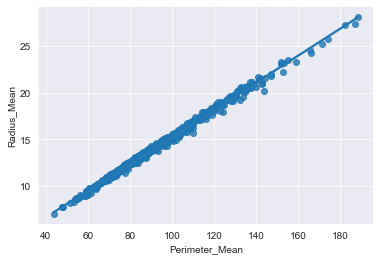

In [102]:
sns.regplot(data = df, x="Perimeter_Mean", y = "Radius_Mean")

### Удалим признаки из основного df, у которых корреляция > 0.9, и при этом корреляция с Diagnosis_Int минимальна

In [103]:
colForDrop = []
corField = []
for column in corr:
    corInside = []
    for row in corr.index[abs(corr[column]) > 0.9]:
        if row != column and column not in corField:
            corField.append(column)
            corInside.append(column)
        if row != column and row not in corField:
            corInside.append(row)
        if row != column and row not in corField:
            corField.append(row)
    if len(corInside) > 1:
        corInside = sorted(corInside, key=lambda x: diagnosis_corr[x])
        colForDrop.extend(corInside[:-1])

In [104]:
colForDrop

['Area_Mean',
 'Radius_Mean',
 'Area_Largest',
 'Perimeter_Mean',
 'Radius_Largest',
 'Texture_Mean',
 'Concavity_Mean',
 'Area_Standard_error',
 'Perimeter_Standard_error']

In [105]:
df = df.drop(labels=colForDrop, axis=1)

### Найдем пары признаков, у которых корреляция > 0.8

In [106]:
corr = df.corr()
corField = []
counter = 0
for column in corr:
    for row in corr.index[abs(corr[column]) > 0.8]:
        if row != column and (row, column) not in corField:
            corField.append((column, row))
            print(f"{row} {column} {corr.loc[row, column]}")
            counter += 1
print(counter)

Smoothness_Largest Smoothness_Mean 0.8053241954943627
Concave_points_Mean Compactness_Mean 0.831135043133698
Compactness_Largest Compactness_Mean 0.8658090398022629
Concavity_Largest Compactness_Mean 0.8162752498000281
Concave_points_Largest Compactness_Mean 0.8155732235690644
Perimeter_Largest Concave_points_Mean 0.8559231281343119
Concave_points_Largest Concave_points_Mean 0.9101553142985918
Concavity_Standard_error Compactness_Standard_error 0.8012683427383291
Fractal_dimension_Standard_error Compactness_Standard_error 0.8032688176617679
Concave_points_Largest Perimeter_Largest 0.8163221016875439
Concavity_Largest Compactness_Largest 0.8922608987764685
Concave_points_Largest Compactness_Largest 0.8010803646352528
Fractal_dimension_Largest Compactness_Largest 0.8104548563116117
Concave_points_Largest Concavity_Largest 0.8554338603439982
14


### Исследуем столбцы, у которых корреляция > 0.8

In [108]:
corr = df.corr()
colForDrop = []
corField = []
for column in corr:
    corInside = []
    for row in corr.index[abs(corr[column]) > 0.8]:
        if row != column and column not in corField:
            corField.append(column)
            corInside.append(column)
        if row != column and row not in corField:
            corInside.append(row)
        if row != column and row not in corField:
            corField.append(row)
    if len(corInside) > 1:
        corInside = sorted(corInside, key=lambda x: diagnosis_corr[x])
        colForDrop.extend(corInside[:-1])

In [19]:
colForDrop

['Smoothness_Mean',
 'Compactness_Largest',
 'Compactness_Mean',
 'Concavity_Largest',
 'Concave_points_Mean',
 'Fractal_dimension_Standard_error',
 'Concavity_Standard_error']

#### Проверим Concavity_Standard_error и Compactness_Standard_error

<AxesSubplot:xlabel='Concavity_Standard_error', ylabel='Compactness_Standard_error'>

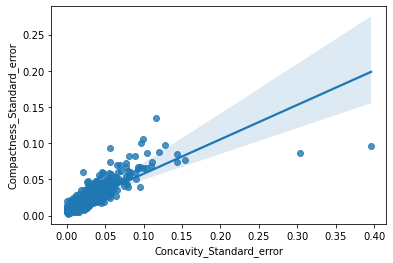

In [20]:
sns.regplot(data=df, x="Concavity_Standard_error", y="Compactness_Standard_error")

<AxesSubplot:xlabel='Diagnosis', ylabel='Concavity_Standard_error'>

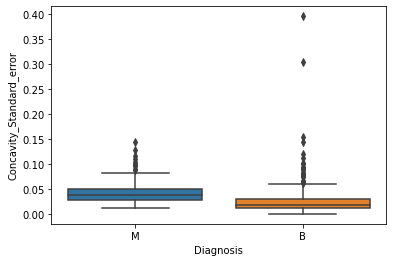

In [21]:
sns.boxplot(data=df, x="Diagnosis", y="Concavity_Standard_error")

<AxesSubplot:xlabel='Diagnosis', ylabel='Compactness_Standard_error'>

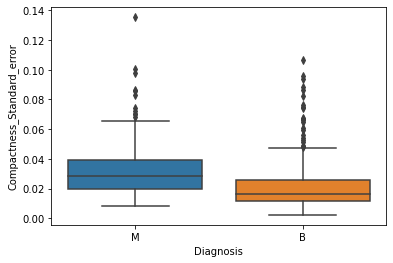

In [22]:
sns.boxplot(data=df, x="Diagnosis", y="Compactness_Standard_error")

#### Проверим Smoothness_Largest и Smoothness_Mean

<AxesSubplot:xlabel='Smoothness_Largest', ylabel='Smoothness_Mean'>

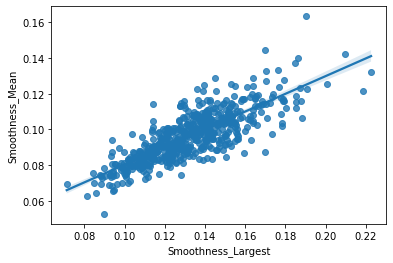

In [23]:
sns.regplot(data=df, x="Smoothness_Largest", y="Smoothness_Mean")

<AxesSubplot:xlabel='Diagnosis', ylabel='Smoothness_Largest'>

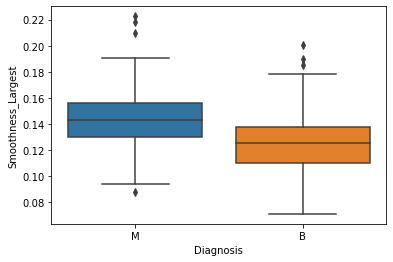

In [24]:
sns.boxplot(data=df, x="Diagnosis", y="Smoothness_Largest")

<AxesSubplot:xlabel='Diagnosis', ylabel='Smoothness_Mean'>

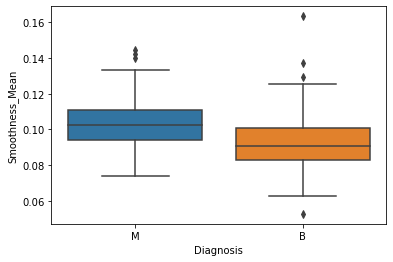

In [25]:
sns.boxplot(data=df, x="Diagnosis", y="Smoothness_Mean")

##### Итог: особой разницы не обнаруженно

### Удалим признаки из основного df, у которых корреляция > 0.8, и при этом корреляция с Diagnosis_Int минимальна

In [26]:
df = df.drop(labels=colForDrop, axis=1)

### Итого осталось 14 признаков

In [27]:
corr = df.corr()
corr

,Symmetry_Mean,Fractal_dimension_Mean,Radius_Standard_error,Texture_Standard_error,Smoothness_Standard_error,Compactness_Standard_error,Concave_points_Standard_error,Symmetry_Standard_error,Texture_Largest,Perimeter_Largest,Smoothness_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Symmetry_Mean,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.090651,0.219169,0.426675,0.430297,0.699826,0.438413,0.330499
Fractal_dimension_Mean,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,-0.051269,-0.205151,0.504942,0.175325,0.334019,0.767297,-0.012838
Radius_Standard_error,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.194799,0.719684,0.141919,0.531062,0.094543,0.049559,0.567134
Texture_Standard_error,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,0.409003,-0.102242,-0.073658,-0.119638,-0.128215,-0.045655,-0.008303
Smoothness_Standard_error,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.328429,0.413506,-0.074743,-0.217304,0.314457,-0.102007,-0.107342,0.101480,-0.067016
Compactness_Standard_error,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.744083,0.394713,0.143003,0.260516,0.227394,0.483208,0.277878,0.590973,0.292999
Concave_points_Standard_error,0.393298,0.341198,0.513346,0.230283,0.328429,0.744083,1.000000,0.312780,0.086741,0.394999,0.215351,0.602450,0.143116,0.310655,0.408042
Symmetry_Standard_error,0.449137,0.345007,0.240567,0.411621,0.413506,0.394713,0.312780,1.000000,-0.077473,-0.103753,-0.012662,-0.030413,0.389402,0.078079,-0.006522
Texture_Largest,0.090651,-0.051269,0.194799,0.409003,-0.074743,0.143003,0.086741,-0.077473,1.000000,0.365098,0.225429,0.359755,0.233027,0.219122,0.456903
Perimeter_Largest,0.219169,-0.205151,0.719684,-0.102242,-0.217304,0.260516,0.394999,-0.103753,0.365098,1.000000,0.236775,0.816322,0.269493,0.138957,0.782914


<AxesSubplot:>

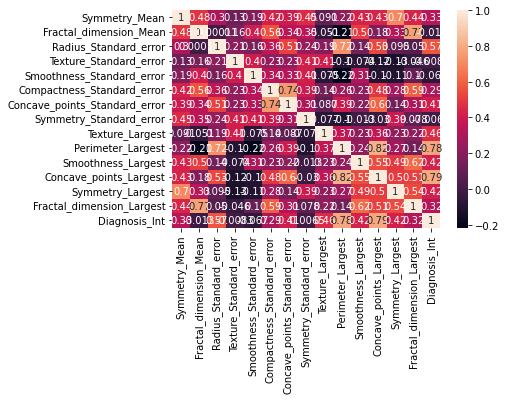

In [28]:
sns.heatmap(corr, annot=True)

## Группировка значений

In [29]:
df.groupby(['Diagnosis']).count()

,Symmetry_Mean,Fractal_dimension_Mean,Radius_Standard_error,Texture_Standard_error,Smoothness_Standard_error,Compactness_Standard_error,Concave_points_Standard_error,Symmetry_Standard_error,Texture_Largest,Perimeter_Largest,Smoothness_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Diagnosis,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


<AxesSubplot:xlabel='Diagnosis', ylabel='Count'>

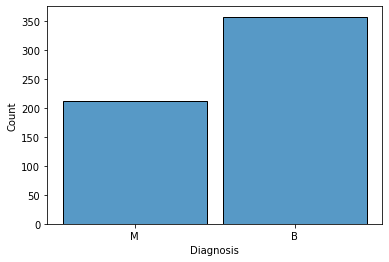

In [30]:
sns.histplot(data=df, x="Diagnosis", shrink=.9)

### Min

In [31]:
df_diag_min_group = df.groupby(['Diagnosis']).min()
df_diag_min_group

,Symmetry_Mean,Fractal_dimension_Mean,Radius_Standard_error,Texture_Standard_error,Smoothness_Standard_error,Compactness_Standard_error,Concave_points_Standard_error,Symmetry_Standard_error,Texture_Largest,Perimeter_Largest,Smoothness_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Diagnosis,,,,,,,,,,,,,,,
B,0.1060,0.05185,0.1115,0.3602,0.001713,0.002252,0.000000,0.009539,12.02,50.41,0.07117,0.00000,0.1566,0.05521,0
M,0.1308,0.04996,0.1938,0.3621,0.002667,0.008422,0.005174,0.007882,16.67,85.10,0.08822,0.02899,0.1565,0.05504,1


In [32]:
pd_series_min = df_diag_min_group.diff().reset_index().iloc[1][1:]
pd_series_min[pd_series_min < 0]

Fractal_dimension_Mean       -0.00189
Symmetry_Standard_error     -0.001657
Symmetry_Largest              -0.0001
Fractal_dimension_Largest    -0.00017
Name: 1, dtype: object

#### Исследуем признаки, указанные выше (те, у которых разница между min значениями отрицательная)

<AxesSubplot:xlabel='Diagnosis', ylabel='Fractal_dimension_Mean'>

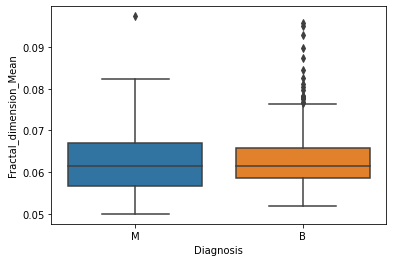

In [33]:
sns.boxplot(data=df, x="Diagnosis", y="Fractal_dimension_Mean")

<AxesSubplot:xlabel='Diagnosis', ylabel='Symmetry_Standard_error'>

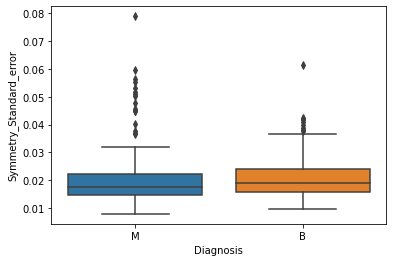

In [34]:
sns.boxplot(data=df, x="Diagnosis", y="Symmetry_Standard_error")

<AxesSubplot:xlabel='Diagnosis', ylabel='Symmetry_Largest'>

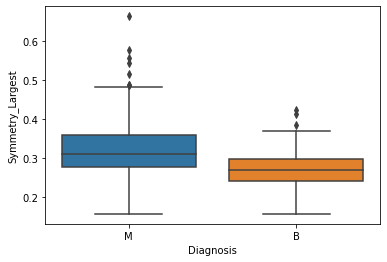

In [35]:
sns.boxplot(data=df, x="Diagnosis", y="Symmetry_Largest")

<AxesSubplot:xlabel='Diagnosis', ylabel='Fractal_dimension_Largest'>

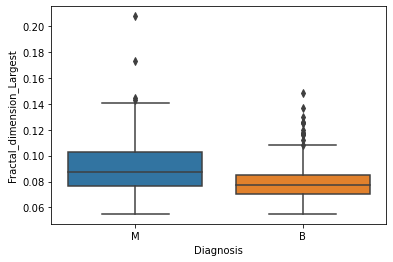

In [36]:
sns.boxplot(data=df, x="Diagnosis", y="Fractal_dimension_Largest")

##### Похоже, что признак Fractal_dimension_Mean бесполезен

### Mean

In [37]:
df_diag_mean_group = df.groupby(['Diagnosis']).mean()
df_diag_mean_group

,Symmetry_Mean,Fractal_dimension_Mean,Radius_Standard_error,Texture_Standard_error,Smoothness_Standard_error,Compactness_Standard_error,Concave_points_Standard_error,Symmetry_Standard_error,Texture_Largest,Perimeter_Largest,Smoothness_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Diagnosis,,,,,,,,,,,,,,,
B,0.174186,0.062867,0.284082,1.220380,0.007196,0.021438,0.009858,0.020584,23.515070,87.005938,0.124959,0.074444,0.270246,0.079442,0.0
M,0.192909,0.062680,0.609083,1.210915,0.006780,0.032281,0.015060,0.020472,29.318208,141.370330,0.144845,0.182237,0.323468,0.091530,1.0


In [38]:
pd_series_mean = df_diag_mean_group.diff().reset_index().iloc[1][1:]
pd_series_mean[pd_series_mean < 0]

Fractal_dimension_Mean      -0.000187
Texture_Standard_error      -0.009465
Smoothness_Standard_error   -0.000416
Symmetry_Standard_error     -0.000111
Name: 1, dtype: object

#### Исследуем признаки, указанные выше (те, у которых разница между mean значениями отрицательная)

<AxesSubplot:xlabel='Diagnosis', ylabel='Texture_Standard_error'>

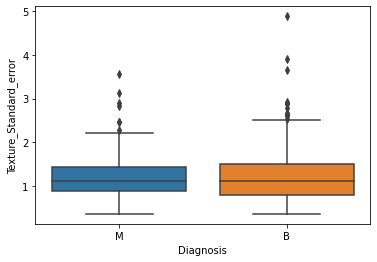

In [39]:
sns.boxplot(data=df, x="Diagnosis", y="Texture_Standard_error")

<AxesSubplot:xlabel='Diagnosis', ylabel='Smoothness_Standard_error'>

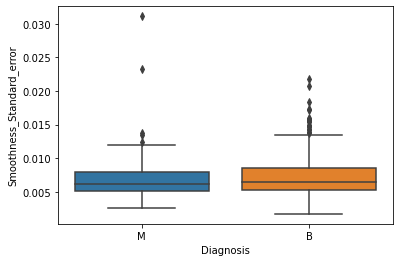

In [40]:
sns.boxplot(data=df, x="Diagnosis", y="Smoothness_Standard_error")

<AxesSubplot:xlabel='Diagnosis', ylabel='Symmetry_Standard_error'>

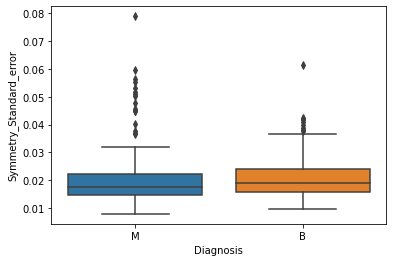

In [41]:
sns.boxplot(data=df, x="Diagnosis", y="Symmetry_Standard_error")

##### Похоже, что признак Texture_Standard_error и Smoothness_Standard_error бесполезены

### Max

In [42]:
df_diag_max_group = df.groupby(['Diagnosis']).max()
df_diag_max_group

,Symmetry_Mean,Fractal_dimension_Mean,Radius_Standard_error,Texture_Standard_error,Smoothness_Standard_error,Compactness_Standard_error,Concave_points_Standard_error,Symmetry_Standard_error,Texture_Largest,Perimeter_Largest,Smoothness_Largest,Concave_points_Largest,Symmetry_Largest,Fractal_dimension_Largest,Diagnosis_Int
Diagnosis,,,,,,,,,,,,,,,
B,0.2743,0.09575,0.8811,4.885,0.02177,0.1064,0.05279,0.06146,41.78,127.1,0.2006,0.175,0.4228,0.1486,0
M,0.3040,0.09744,2.8730,3.568,0.03113,0.1354,0.04090,0.07895,49.54,251.2,0.2226,0.291,0.6638,0.2075,1


In [43]:
pd_series_max = df_diag_max_group.diff().reset_index().loc[1][1:]
pd_series_max[pd_series_max < 0]

Texture_Standard_error            -1.317
Concave_points_Standard_error   -0.01189
Name: 1, dtype: object

##### Весьма спорные результаты для Max

## Диаграммы рассеяния

### Рассмотрим распределения для признаков Fractal_dimension_Mean, Texture_Standard_error и Smoothness_Standard_error

<AxesSubplot:xlabel='Fractal_dimension_Mean', ylabel='Density'>

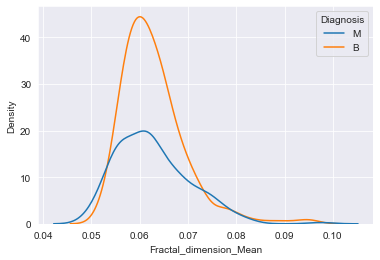

In [44]:
sns.set_style("darkgrid")
sns.kdeplot(data=df, x="Fractal_dimension_Mean", hue="Diagnosis")

<AxesSubplot:xlabel='Texture_Standard_error', ylabel='Density'>

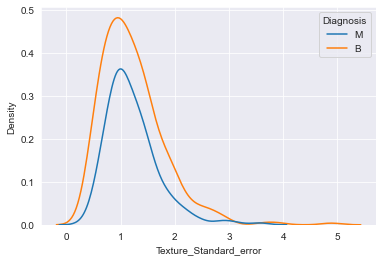

In [45]:
sns.kdeplot(data=df, x="Texture_Standard_error", hue="Diagnosis")

<AxesSubplot:xlabel='Smoothness_Standard_error', ylabel='Density'>

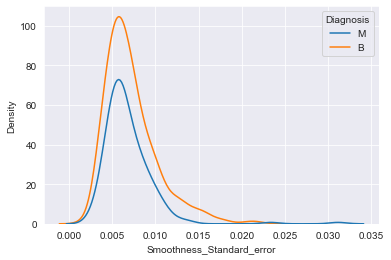

In [46]:
sns.kdeplot(data=df, x="Smoothness_Standard_error", hue="Diagnosis")

#### Как видим, в признаках Fractal_dimension_Mean, Texture_Standard_error и Smoothness_Standard_error наши группы совершенно не отличимы. Поэтому стоит удалим эти признаки из df.

In [47]:
df = df.drop(["Fractal_dimension_Mean", "Texture_Standard_error", "Smoothness_Standard_error"], axis=1)

### Рассмотрим диаграммы рассеяния для оставшихся признаков

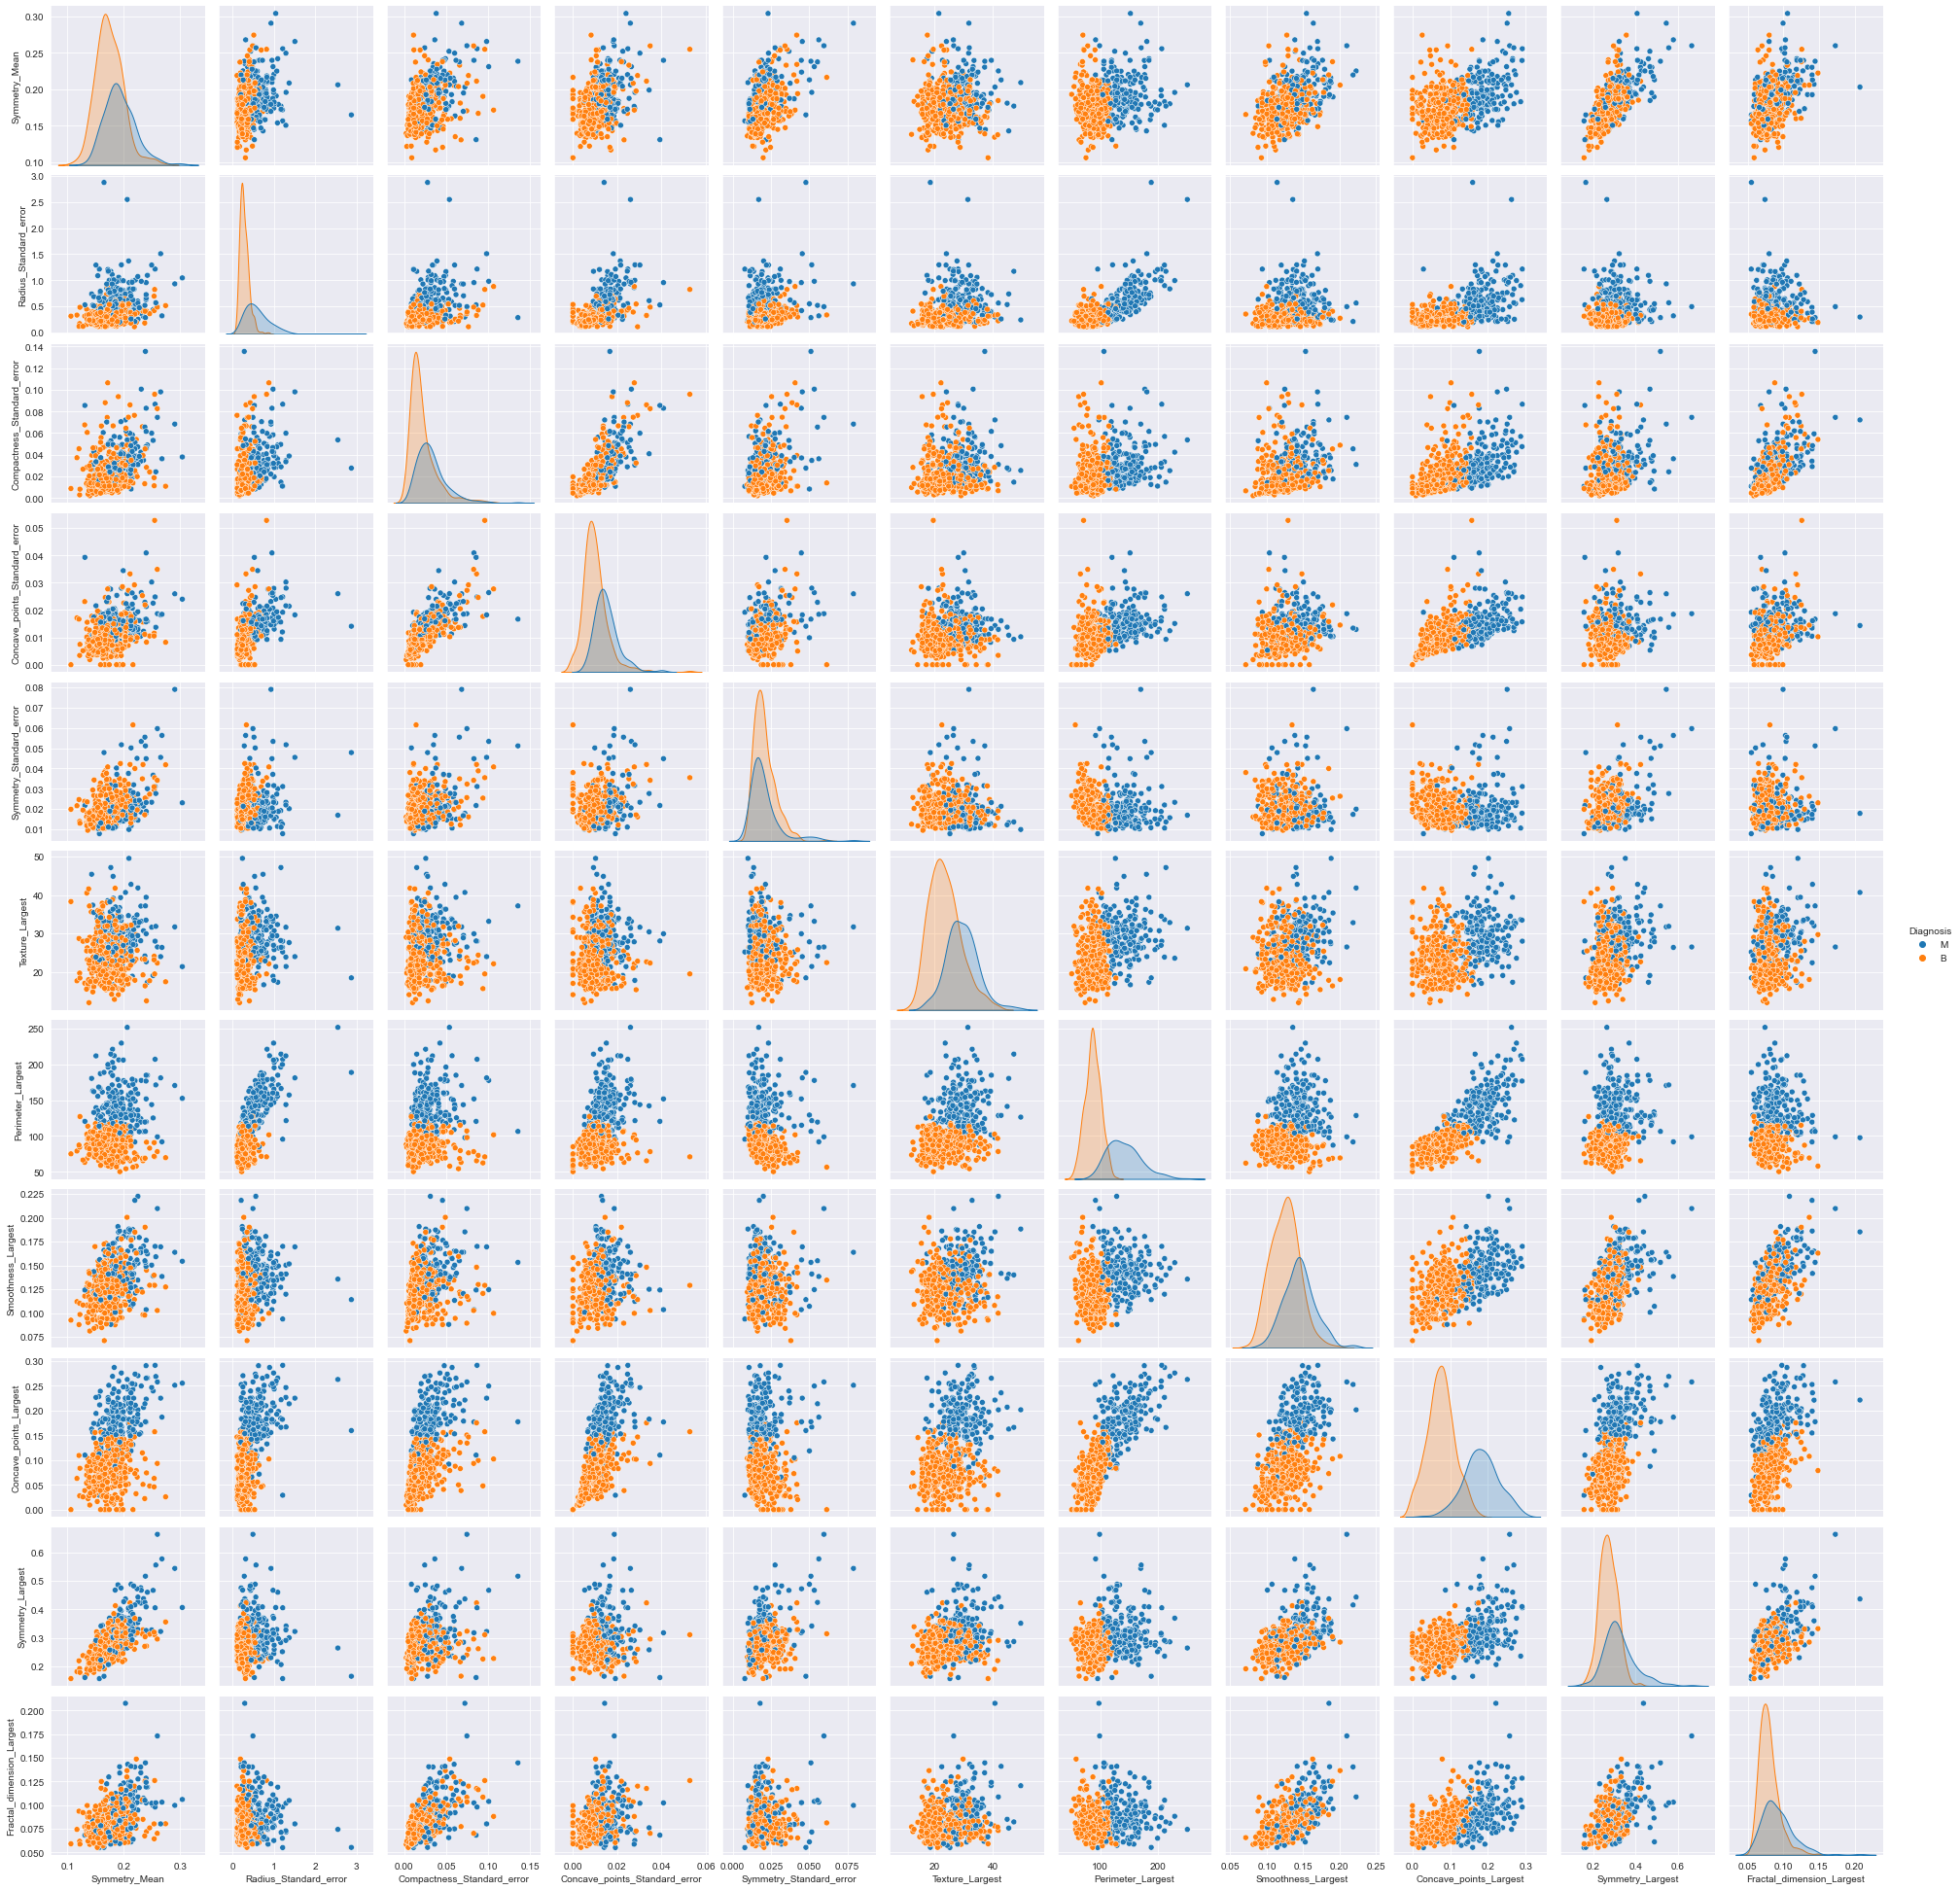

In [48]:
sns.pairplot(data=df.drop("Diagnosis_Int", axis=1), hue="Diagnosis")

<AxesSubplot:xlabel='Perimeter_Largest', ylabel='Concave_points_Largest'>

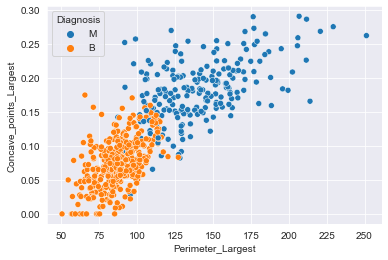

In [49]:
sns.scatterplot(data=df, x="Perimeter_Largest", y="Concave_points_Largest", hue="Diagnosis")

## Корреляция диагноза с остальными величинами

In [50]:
df.corr()["Diagnosis_Int"].sort_values()

Symmetry_Standard_error         -0.006522
Compactness_Standard_error       0.292999
Fractal_dimension_Largest        0.323872
Symmetry_Mean                    0.330499
Concave_points_Standard_error    0.408042
Symmetry_Largest                 0.416294
Smoothness_Largest               0.421465
Texture_Largest                  0.456903
Radius_Standard_error            0.567134
Perimeter_Largest                0.782914
Concave_points_Largest           0.793566
Diagnosis_Int                    1.000000
Name: Diagnosis_Int, dtype: float64

#### Symmetry_Standard_error совсем не коррелирует с Diagnosis_Int, поэтому проверим его

<AxesSubplot:xlabel='Symmetry_Standard_error', ylabel='Density'>

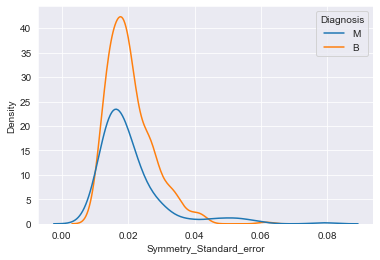

In [51]:
sns.kdeplot(data=df, x="Symmetry_Standard_error", hue="Diagnosis")

<AxesSubplot:xlabel='Symmetry_Standard_error', ylabel='Diagnosis_Int'>

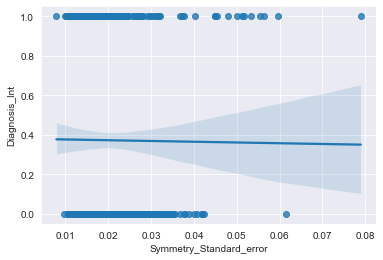

In [52]:
sns.regplot(data=df, x="Symmetry_Standard_error", y="Diagnosis_Int", logistic=True)

<AxesSubplot:xlabel='Compactness_Standard_error', ylabel='Diagnosis_Int'>

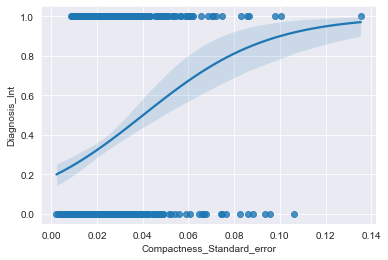

In [53]:
sns.regplot(data=df, x="Compactness_Standard_error", y="Diagnosis_Int", logistic=True)

<AxesSubplot:xlabel='Concave_points_Largest', ylabel='Diagnosis_Int'>

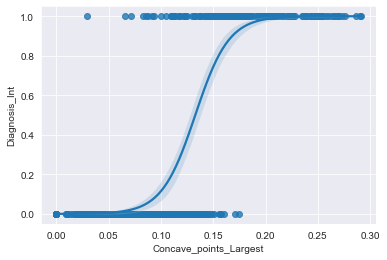

In [54]:
sns.regplot(data=df, x="Concave_points_Largest", y="Diagnosis_Int", logistic=True)

#### Видим, что признак Symmetry_Standard_error мало некоррелирует с Diagnosis, и логистическую регрессию построить не удалось. Поэтому удалим этот признак из рассматриваемых признаков.

In [55]:
df = df.drop(labels="Symmetry_Standard_error", axis=1)

## Итог по статистической обработке признаков и их корреляции с Diagnosis

In [56]:
df.corr()["Diagnosis_Int"].sort_values()

Compactness_Standard_error       0.292999
Fractal_dimension_Largest        0.323872
Symmetry_Mean                    0.330499
Concave_points_Standard_error    0.408042
Symmetry_Largest                 0.416294
Smoothness_Largest               0.421465
Texture_Largest                  0.456903
Radius_Standard_error            0.567134
Perimeter_Largest                0.782914
Concave_points_Largest           0.793566
Diagnosis_Int                    1.000000
Name: Diagnosis_Int, dtype: float64

<AxesSubplot:>

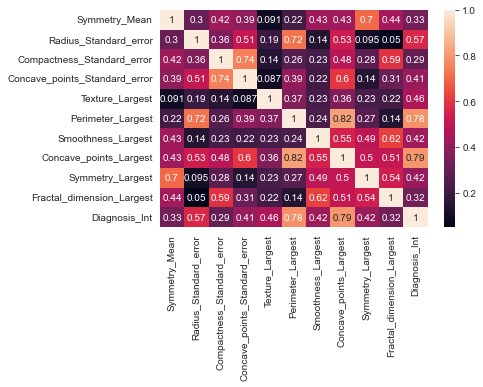

In [75]:
sns.heatmap(df.corr(), annot=True)

### Проверим также p-value (уровень значимости) при нулевой гоипотезе: "Признак коррелирует с Diagnosis_Int"

In [57]:
for column in df.drop(labels=["Diagnosis", "Diagnosis_Int"], axis=1).columns:
    pears_corr, p_val = stats.pearsonr(df[column], df["Diagnosis_Int"])
    print(f"{column}: correlation = {pears_corr} ; p-value = {p_val}")

Symmetry_Mean: correlation = 0.3304985542625471 ; p-value = 5.733384028463847e-16
Radius_Standard_error: correlation = 0.5671338208247177 ; p-value = 9.738948656455998e-50
Compactness_Standard_error: correlation = 0.29299924424885837 ; p-value = 9.975994654069982e-13
Concave_points_Standard_error: correlation = 0.4080423327165046 ; p-value = 3.0723087688164388e-24
Texture_Largest: correlation = 0.4569028213967983 ; p-value = 1.0780574879487261e-30
Perimeter_Largest: correlation = 0.7829141371737592 ; p-value = 5.771397139666877e-119
Smoothness_Largest: correlation = 0.4214648610664027 ; p-value = 6.575143633980474e-26
Concave_points_Largest: correlation = 0.79356601714127 ; p-value = 1.9690997072156805e-124
Symmetry_Largest: correlation = 0.4162943110486191 ; p-value = 2.9511205771522968e-25
Fractal_dimension_Largest: correlation = 0.3238721887208239 ; p-value = 2.3164324499817004e-15


## Anova

#### Для Anova нулевая гипотеза - средние двух совокупностей близки. Если p-value меньше порогового значения, то нулевая гипотеза откланяется и считается, что средние значения двух совокупоностей различны.

#### Проверим, что средние для признаков для групп из Diagnosis различны.

In [58]:
for column in df.drop(labels=["Diagnosis", "Diagnosis_Int"], axis=1).columns:
    F_stat, p_val = stats.f_oneway(df[column][df["Diagnosis"] == "M"].values, df[column][df["Diagnosis"] == "B"].values)
    print(f"{column} : F-statistics = {F_stat} , p-value = {p_val}")

Symmetry_Mean : F-statistics = 69.52744350046247 , p-value = 5.73338402846732e-16
Radius_Standard_error : F-statistics = 268.8403269673439 , p-value = 9.738948656462521e-50
Compactness_Standard_error : F-statistics = 53.247339128120366 , p-value = 9.975994654075776e-13
Concave_points_Standard_error : F-statistics = 113.26275994492417 , p-value = 3.072308768818453e-24
Texture_Largest : F-statistics = 149.5969046860517 , p-value = 1.0780574879494634e-30
Perimeter_Largest : F-statistics = 897.9442188597803 , p-value = 5.771397139669512e-119
Smoothness_Largest : F-statistics = 122.47288045844454 , p-value = 6.575143633985019e-26
Concave_points_Largest : F-statistics = 964.3853934517023 , p-value = 1.9690997072169153e-124
Symmetry_Largest : F-statistics = 118.86023213619767 , p-value = 2.9511205771542106e-25
Fractal_dimension_Largest : F-statistics = 66.44396064960034 , p-value = 2.31643244998312e-15


#### Видим, что для всех признаков p-value малы, поэтому можно считать , что средние различны.

#### Пример, когда тест ANOVA принимает нулевую гипотезу (p-value большое) для занкомого признака Fractal_dimension_Mean

In [59]:
stats.f_oneway(df_base["Fractal_dimension_Mean"][df_base["Diagnosis"] == "M"].values, df_base["Fractal_dimension_Mean"][df_base["Diagnosis"] == "B"].values)

F_onewayResult(statistic=0.09345929487492208, pvalue=0.7599368037255626)

# Анализ данных рака груди с помощью Random Forest

In [60]:
from sklearn import preprocessing as pr

### Исследуем исходные данные

#### Разделим на train и test и стандартизируем

In [61]:
y = df_base["Diagnosis"]
X = df_base.drop(labels = ["Diagnosis", "Diagnosis_Int", "ID"], axis=1)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [63]:
sc = pr.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Обучение

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
rclass = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
rclass.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

#### Оценка важности признаков

In [66]:
importances = list(zip(rclass.feature_importances_, df_base.drop(labels=["Diagnosis", "Diagnosis_Int", "ID"], axis=1).columns))
importances = sorted(importances, key = lambda x: x[0])

In [67]:
importances[:]

[(0.0, 'Fractal_dimension_Standard_error'),
 (7.864432659838607e-05, 'Texture_Standard_error'),
 (0.00010640269212092392, 'Compactness_Standard_error'),
 (0.0004550542969998326, 'Symmetry_Standard_error'),
 (0.0005384753610779516, 'Smoothness_Standard_error'),
 (0.0008790315696721095, 'Smoothness_Mean'),
 (0.0014450190170781144, 'Concavity_Standard_error'),
 (0.0015024161065023919, 'Fractal_dimension_Mean'),
 (0.001670384020576382, 'Symmetry_Mean'),
 (0.001999113416559292, 'Texture_Largest'),
 (0.003854396430572351, 'Concave_points_Standard_error'),
 (0.004185428123184181, 'Symmetry_Largest'),
 (0.004386604735119604, 'Texture_Mean'),
 (0.006145436613910449, 'Smoothness_Largest'),
 (0.007960007987867964, 'Perimeter_Standard_error'),
 (0.008492469258838658, 'Compactness_Mean'),
 (0.009754449805344739, 'Fractal_dimension_Largest'),
 (0.01600205828863309, 'Compactness_Largest'),
 (0.021729642534299876, 'Concavity_Largest'),
 (0.022378604474911138, 'Radius_Standard_error'),
 (0.036504678813

#### Коэффициент детерминации

In [68]:
rclass.score(X_test, y_test)

0.9385964912280702

### Исследуем данные, которые ранее были обработаны

#### Разделим на train и test и стандартизируем

In [76]:
y = df["Diagnosis"]
X = df.drop(labels=["Diagnosis", "Diagnosis_Int"], axis=1)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

#### Обучение

In [79]:
rclass = RandomForestClassifier()
rclass.fit(X_train, y_train)

RandomForestClassifier()

#### Оценка важности признаков

In [86]:
importances = list(zip(rclass.feature_importances_, df.drop(labels=["Diagnosis", "Diagnosis_Int"], axis=1).columns))
importances = sorted(importances, key = lambda x: x[0])

In [87]:
importances

[(0.014962994742083482, 'Symmetry_Mean'),
 (0.03269923678992165, 'Symmetry_Largest'),
 (0.03603567932822508, 'Perimeter_Largest'),
 (0.04977781263239348, 'Compactness_Standard_error'),
 (0.05188140927470236, 'Concave_points_Largest'),
 (0.06077076435542654, 'Concave_points_Standard_error'),
 (0.07634365301659228, 'Texture_Largest'),
 (0.20996214829309134, 'Radius_Standard_error'),
 (0.4675663015675639, 'Smoothness_Largest')]

#### Коэфициент детерминации

In [88]:
rclass.score(X_test, y_test)

0.935672514619883